In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy import constants as const

### Кривая погложения 

In [107]:
curve = pd.read_csv('absorption_curve.csv')
curve.y -= np.mean(curve.y)
curve.head()

,x,y
0,-5.186757,0.020422
1,-5.148576,-0.097522
2,-4.984750,0.019698
3,-4.976021,-0.076248
4,-4.993983,-0.180464


In [108]:
def gaussian(x, mean, std_dev):
    exponent = -((x - mean) ** 2) / (2 * std_dev ** 2)
    return np.exp(exponent) / (std_dev * np.sqrt(2 * np.pi))

def laplace(x, loc, scale, offset):
    abs_diff = np.abs(x - loc)
    pdf = 0.5 * np.exp(-abs_diff / scale) / scale
    return pdf + offset

def cauchy(x, location, scale):
    pdf = (1 / (np.pi * scale)) / (1 + ((x - location) / scale) ** 2)
    return pdf

In [109]:
from scipy.signal import convolve

data = curve.y
window_size = 3

window = np.ones(window_size) / window_size

smoothed_data = convolve(data, window, mode='same')
smoothed_data += np.mean(smoothed_data)

In [110]:
# curve.y -= np.mean(curve.y)

[2.02304885 0.22985828]
[2.04364396 0.30445444]


Text(0.5, 1.0, 'Оцифровка осциллограммы сигнала резонансного поглащения')

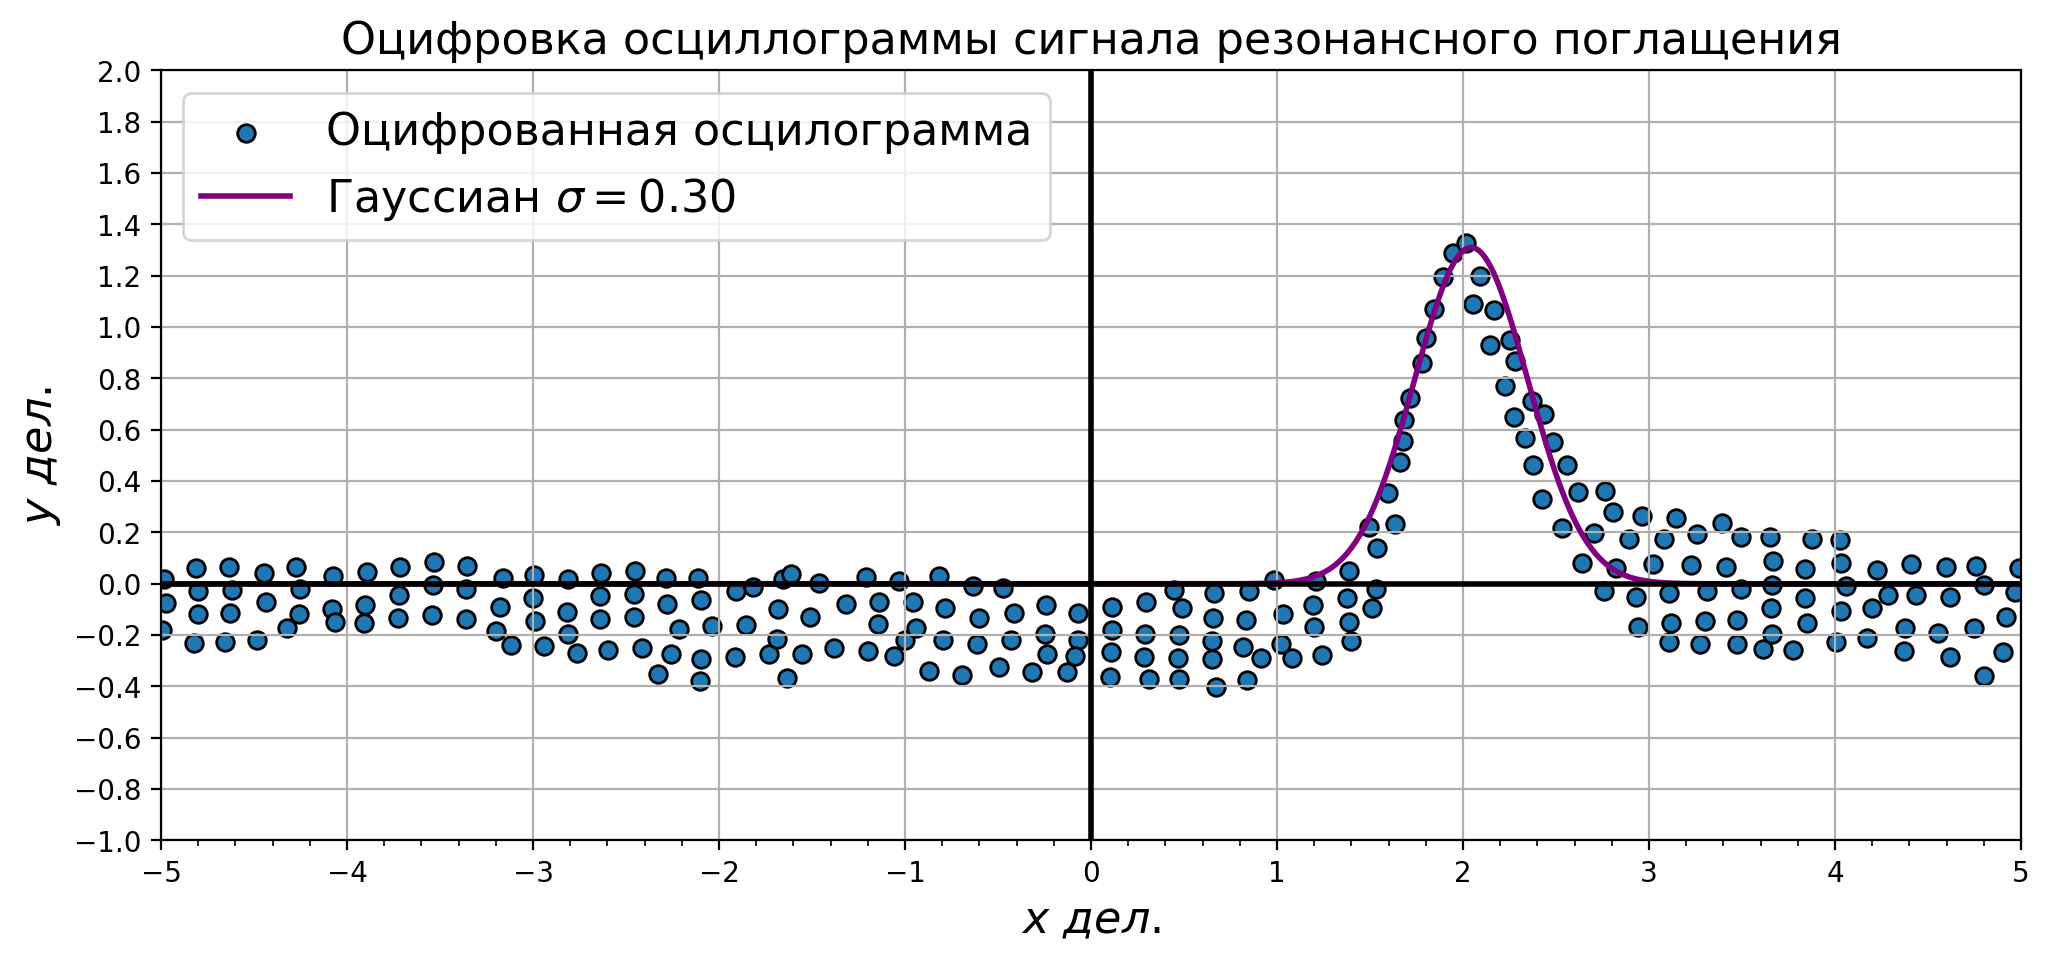

In [111]:
plt.figure(figsize = (12, 5), dpi = 200)

x_line_osc = np.linspace(np.min(curve.x) + 1e-2, np.max(curve.x) - 1e-2, 1000)
most_accurate_zone_mask = (curve.x > 1.4) * (curve.x < 2.8)
# most_accurate_zone_mask = np.ones_like(curve.x)
param_cauchy, _ = curve_fit(cauchy, curve.x, curve.y, p0 = [2, 2])
param_gauss, _ = curve_fit(gaussian, curve.x, curve.y, p0 = [2, 2])
print(param_cauchy)
print(param_gauss)
plt.scatter(curve.x, curve.y, s = 40, edgecolors = 'k', label = 'Оцифрованная осцилограмма')
# plt.plot(x_line_osc, cauchy(x_line_osc, *param_cauchy), color = 'orange', linewidth = 2, label = 'Коши', linestyle = '--')
plt.plot(x_line_osc, gaussian(x_line_osc, *param_gauss), color = 'purple', linewidth = 2, label = f'Гауссиан $\sigma = {param_gauss[1]:.2f}$')
plt.xticks(np.arange(-10, 10, 0.2), minor = True)
plt.xticks(np.arange(-10, 10, 1))
plt.yticks(np.arange(-10, 10, 0.2))
plt.ylim(-1, 2)
plt.xlim(-5, 5)
plt.axhline(0, linewidth = 2, color = 'black')
plt.axvline(0, linewidth = 2, color = 'black')
plt.grid()
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel(r"$x \ дел.$", fontsize = 16)
plt.ylabel(r"$y \ дел.$", fontsize = 16)
plt.title(r"Оцифровка осциллограммы сигнала резонансного поглащения", fontsize = 16)

In [112]:
A_full = 2 * 2.375 * param_gauss[1]
A_half = 2 * np.sqrt(2 * np.log(2)) * param_gauss[1]
print(A_full)
print(A_half)


1.4461585890750126
0.7169354176521086


In [113]:
f0 = 161.920 * 1e6 #Гц
N = 44
d = 14 * 1e-3
e = 8 * 1e-3 #В
nu = 50

In [114]:
mu_b = 927 * 1e-26


In [116]:
U0 = 50 
e0 = 11.9 * 1e-3
B0 = 2 * e0 / (np.power(np.pi, 2) *nu * N * np.power(d, 2))
print(B0 * 1e3)
g = (const.h * f0) / (mu_b * B0)
print(g)

5.592402993245915
2.0695614730461256
